# Using Predictive Analysis To Predict Diagnosis of a Breast Tumor

Aneequa Narmeen 

# DATA CLEANING 

# 1. Identify the problem
Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a result of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound, and biopsy are commonly used to diagnose breast cancer performed


# 1.1 Expected outcome
Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:
•	1= Malignant (Cancerous) - Present
•	0= Benign (Not Cancerous) -Absent


# 1.3 Prediction Using KNN Algorithm
This project focuses on developing a cancer prediction model using the K-Nearest Neighbors (KNN) algorithm, a popular machine learning technique. The aim is to classify whether a given set of medical data points to a diagnosis of cancer or not. The project involves gathering relevant medical data, pre-processing it for analysis, and training the KNN model to recognize patterns indicative of cancer. By leveraging the KNN algorithm, the model can make accurate predictions and potentially assist medical professionals in early diagnosis and treatment planning. The ultimate goal is to improve healthcare outcomes through reliable, machine learning-driven predictions.


# Getting Started: Load libraries and set options

In [18]:
# to enable plotting graphs in jupyter notebook 
%matplotlib inline 

In [19]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import zscore
import seaborn as sns #for plotting
import matplotlib.pyplot as plt

#Load the Dataset 
load the supplied CSV file using additional options in the Pandas read_csv function and name the data frame as bc_df

In [20]:
bc_df = pd.read_csv('wisc_bc_data.csv')
bc_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [21]:
NNH = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
#look for the 5 nearest neighbor 

In [22]:
bc_df.shape

(569, 32)

In the result displayed, you can see the data has 569 records, each with 32 columns.



In [23]:
bc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

The “info()” method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

The method get_dtype_counts() will return the number of columns of each type in a DataFrame:

In [24]:
bc_df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [25]:
bc_df.tail()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810
568,9012795,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666


The head and tail command gives the first and last few datas from the dataset

# Exploratory data analysis 
(EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.



The purpose of EDA is:

To use summary statistics and visualizations to better understand data, 
find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
For data preprocessing to be successful, it is essential to have an overall picture of your data Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.**


In [26]:
bc_df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [27]:
bc_df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [28]:
#convert the object into numeric values 
bc_df['diagnosis'] = bc_df.diagnosis.astype('category')

bc_df.dtypes


id                      int64
diagnosis            category
radius_mean           float64
texture_mean          float64
perimeter_mean        float64
area_mean             float64
smoothness_mean       float64
compactness_mean      float64
concavity_mean        float64
points_mean           float64
symmetry_mean         float64
dimension_mean        float64
radius_se             float64
texture_se            float64
perimeter_se          float64
area_se               float64
smoothness_se         float64
compactness_se        float64
concavity_se          float64
points_se             float64
symmetry_se           float64
dimension_se          float64
radius_worst          float64
texture_worst         float64
perimeter_worst       float64
area_worst            float64
smoothness_worst      float64
compactness_worst     float64
concavity_worst       float64
points_worst          float64
symmetry_worst        float64
dimension_worst       float64
dtype: object

In [29]:
bc_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [30]:
bc_df = bc_df.drop(labels = 'id', axis = 1)


In [31]:
bc_df.shape

(569, 31)

In [32]:
bc_df.groupby(['diagnosis']).count()
#to combine both benin and malignant

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


The intention for the above code is to combine the counts of both 'benign' and 'malignant' diagnoses into a single count.

So, this code will output a DataFrame where each unique value in the 'diagnosis' column is listed as an index, and the count of occurrences of each value is listed in the corresponding column. This information can be useful for various types of analysis, such as understanding the distribution of diagnoses in the dataset.

In [33]:
#create a seperate dataframe consisting only of the features #i.e independent attributes 

bc_feature_df = bc_df.drop(labels = 'diagnosis', axis = 1)
print(bc_feature_df)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          12.32         12.39           78.85      464.1          0.10280   
1          10.60         18.95           69.28      346.4          0.09688   
2          11.04         16.83           70.92      373.2          0.10770   
3          11.28         13.39           73.00      384.8          0.11640   
4          15.19         13.21           97.65      711.8          0.07963   
..           ...           ...             ...        ...              ...   
564        13.17         18.22           84.28      537.3          0.07466   
565        10.26         14.71           66.20      321.6          0.09882   
566        15.28         22.41           98.92      710.6          0.09057   
567        14.53         13.98           93.86      644.2          0.10990   
568        21.37         15.10          141.30     1386.0          0.10010   

     compactness_mean  concavity_mean  points_mean  symmetry_me

This code creates a new DataFrame called bc_feature_df by removing the 'diagnosis' column from the original DataFrame bc_df. 
bc_feature_df will contain all the columns from the original DataFrame bc_df except for the 'diagnosis' column. This new DataFrame will consist only of the features, or independent attributes, of the dataset.

In [34]:
bc_feature_df_z = bc_feature_df.apply(zscore) # converts all attributes to zscale 
bc_feature_df_z.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.576556e-16,-7.711075e-16,-1.186319e-16,-2.029230e-16,1.717041e-16,1.935573e-16,4.058460e-17,-5.619407e-17,1.638994e-16,-1.492265e-15,...,-9.209583e-17,1.560946e-18,-3.777490e-16,-1.779479e-16,-2.239958e-16,9.365678e-18,9.053488e-17,2.263372e-16,2.684828e-16,2.044840e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


# Z-score
Z score normalization (also known as standardization) is performed to ensure that all the attributes are on the same scale. This is important for many machine learning algorithms because it prevents certain attributes from having a disproportionate influence on the model just because they have larger scales or ranges compared to other attributes. Normalizing the data helps algorithms converge faster and can also improve their performance.

By converting the attributes to z-scores, each attribute will have a mean of 0 and a standard deviation of 1, which makes it easier to compare the relative importance of different attributes in the dataset.

In [35]:
#capture the class values from the diagnosis column into the pandas series akin to array 
bc_labels = bc_df['diagnosis']

# Assesing Model Accuracy: 
 
Split data into training and test sets
The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here I will

Split the available data into a training set and a testing set. (70% training, 30% test)
Train the algorithm on the first part,
make predictions on the second part and
evaluate the predictions against the expected results.

In [36]:
#store the normalised features data into np array 
X = np.array(bc_feature_df_z)
X.shape

(569, 30)

In [37]:
#store the bc_labels data into seperate np array 

y = np.array(bc_labels)
y.shape

(569,)

In [38]:
#split X and y into training and test set in 70:30 ratio

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 1)


To get a better measure of prediction accuracy (which you can use as a proxy for “goodness of fit” of the model), you can successively split the data into folds that you will use for training and testing:

In [39]:
NNH.fit(X_train, y_train)


KNeighborsClassifier(weights='distance')

NNH.fit method is used to train the neural network classifier. In this case, NNH is presumably an instance of a neural network classifier, which might be created using a library like scikit-learn or TensorFlow. The fit() method takes two main arguments: X_train and y_train 

In [40]:
#Testing stage 

predicted_labels = NNH.predict(X_test)
NNH.score(X_test,y_test)

0.9649122807017544

This is for the testing stage of the neural network classifier.  

The result obtained is 96%, it means that the neural network classifier correctly predicted the labels for 96% of the examples in the testing set (X_test).

An accuracy of 96% suggests that the neural network classifier performed well on the testing data, indicating that it has learned meaningful patterns from the training data and generalized well to unseen examples. However, it's essential to consider other metrics and perform further analysis to ensure the model's overall performance and reliability.

# confusion matrix
using scikit-learn's metrics module to calculate accuracy measures and create a confusion matrix. 

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It has rows corresponding to the true class labels and columns corresponding to the predicted class labels. Each cell in the matrix represents the number of instances where the true label is equal to the row and the predicted label is equal to the column.Here's a breakdown of what each part of the confusion matrix represents:
True Positives (TP): Instances where the true label and the predicted label are both positive.
False Positives (FP): Instances where the true label is negative, but the predicted label is positive.
True Negatives (TN): Instances where the true label and the predicted label are both negative.
False Negatives (FN): Instances where the true label is positive, but the predicted label is negative.
The confusion matrix provides valuable insights into the performance of the classifier, allowing you to see where it's making errors and which classes it's confusing with others. This information can be used to further refine and improve the model.

In [42]:
from sklearn import metrics

#calculate accuracy measures and confusion matrix
print(metrics.confusion_matrix(y_test, predicted_labels))

[[112   2]
 [  4  53]]


In summary:

The diagonal elements (112 and 53) represent the correct predictions (True Positives and True Negatives).
The off-diagonal elements (2 and 4) represent the incorrect predictions (False Positives and False Negatives).

In [43]:
cm = confusion_matrix(y_test,predicted_labels)


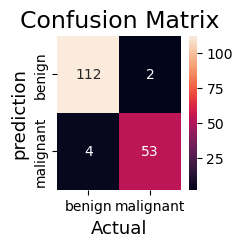

In [44]:
plt.figure(figsize = (2,2))
sns.heatmap(cm,annot = True,fmt = 'g', xticklabels = ['benign','malignant'], yticklabels = ['benign','malignant'])
plt.ylabel('prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title('Confusion Matrix', fontsize = 17)
plt.show()

In [45]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           B       0.97      0.98      0.97       114
           M       0.96      0.93      0.95        57

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Observations:

There are two possible predicted classes: 
    "B" (Benign) and "M" (Malignant).
    The classifier made a total of 171 predictions.
    Out of those 171 cases, the classifier predicted "Benign" 114 times and "Malignant" 57 times.
    In reality, 57 patients in the sample have the Malignant condition, and 114 patients do not.
    The overall accuracy of the classifier is 96%.
    
This report provides a comprehensive summary of the classifier's performance, including precision, recall, f1-score, and support for each class, as well as macro and weighted averages.